Use the imdb script and apply K-NN for predicting the sentiments using review. 

--> Split data.
--> Data preprocessing. --> It is already preprocessed data. So, You just have to use the tfidfVectorizer (tf-idf) to convert from text to vector. 
--> First, do simple cross validation.
--> Than do 10-fold cross validation.
--> At last find the optimal K-value and get the accuracy on test data. 

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv("../../Downloads/Data for ML/imdb.txt")
print(data.head())

   class                                         clean_text
0      0  slow moving aimless movie distressed drifting ...
1      0  not sure lost flat characters audience nearly ...
2      0  attempting artiness black white clever camera ...
3      0                        little music anything speak
4      1  best scene movie gerardo trying find song keep...


In [3]:
X = data["clean_text"].values
Y = data["class"].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train, X_cv, Y_train, Y_cv = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

print(f'{X.shape = } \n{X_train.shape = } \n{X_cv.shape = } \n{X_test.shape = }')

X.shape = (746,) 
X_train.shape = (476,) 
X_cv.shape = (120,) 
X_test.shape = (150,)


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit(X_train)

X_train = tfidf.transform(X_train)
X_cv = tfidf.transform(X_cv)
X_test = tfidf.transform(X_test)

print(f'{X_train.shape = } \n{X_cv.shape = } \n{X_test.shape =}')

X_train.shape = (596, 2488) 
X_cv.shape = (120, 2488) 
X_test.shape =(150, 2488)


Simple Cross Validation.

Maximum accuracy: 0.8
K_optimum = 61
Accuracy of the model on test dataset: 72.67%


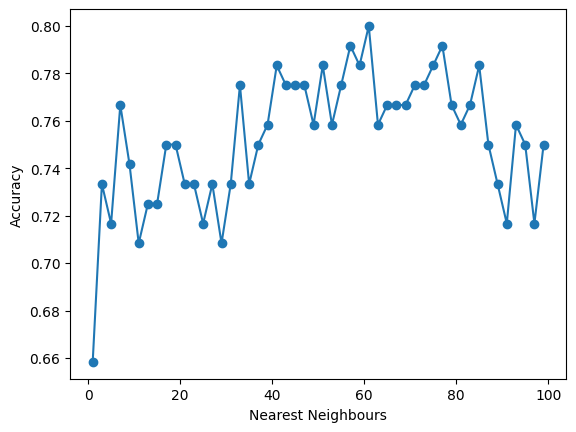

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracy = {}
for i in range(1,100,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    
    # Predict the response on the cross validation data. 
    pred = knn.predict(X_cv)
    
    accuracy[i] = accuracy_score(Y_cv, pred, normalize=True)  

plt.plot(range(1,100,2), accuracy.values())
plt.scatter(range(1,100,2), accuracy.values())
plt.xlabel('Nearest Neighbours')
plt.ylabel('Accuracy')
print(f'Maximum accuracy: {max(accuracy.values())}')
K_optimum = [key for key in accuracy if accuracy[key] == max(accuracy.values())][0]
print(f'{K_optimum = }')

knn = KNeighborsClassifier(n_neighbors=K_optimum)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
acc = accuracy_score(Y_test, pred, normalize=True)
print(f"Accuracy of the model on test dataset: {acc*100:.2f}%")

10-fold cross validation.

In [7]:
X = data["clean_text"].values
Y = data["class"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

tfidf = TfidfVectorizer()
tfidf.fit(X_train)

X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

print(f'{X_train.shape = } \n{X_test.shape =}')

X_train.shape = (596, 2488) 
X_test.shape =(150, 2488)


Maximum accuracy:  0.76
K_optimum = 15


Text(0, 0.5, 'Error -->')

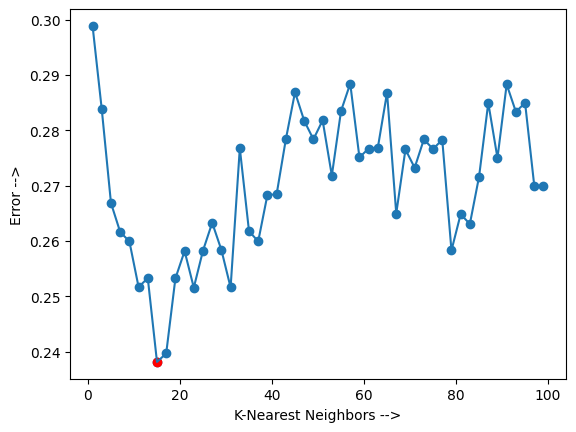

In [35]:
from sklearn.model_selection import cross_val_score
neighbour = [x for x in range(1,100,2)]
cv_scores = {}
for i in neighbour:
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores[i] = score.mean()

print(f'Maximum accuracy:  {max(cv_scores.values()):.2f}')
K_optimum  = [x for x in cv_scores if cv_scores[x] == max(cv_scores.values())][0]
print(f'{K_optimum = }')
error = []
for val in cv_scores.values():
    err = 0
    err = 1 - val
    error.append(err)
  
plt.plot(neighbour, error)
plt.scatter(neighbour, error)
plt.scatter(K_optimum, min(error), c='r')
plt.xlabel('K-Nearest Neighbors -->')
plt.ylabel('Error -->')

KNN with optimum k. 

In [36]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)
acc = accuracy_score(Y_test, pred, normalize=True)
print(f"Accuracy of the model on test dataset: {acc*100:.2f}%")

Accuracy of the model on test dataset: 72.67%


Plotting train error. 

Text(0, 0.5, 'Errors on training dataset -->')

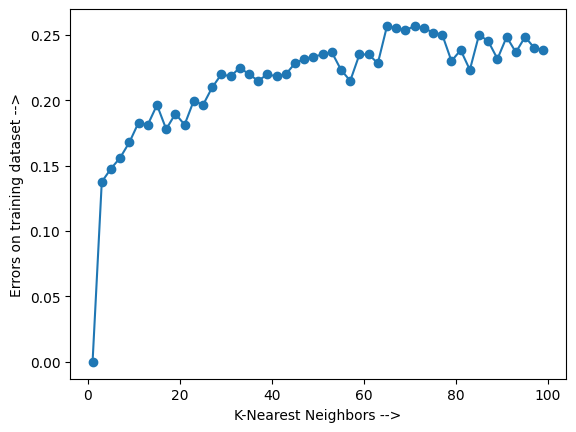

In [39]:
neighbour = [x for x in range(1,100,2)]
acc = []

for k in neighbour:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_train)
    accuracy = accuracy_score(Y_train, pred, normalize=True)
    acc.append(accuracy)

error = [1- ele for ele in acc]
plt.plot(neighbour, error)
plt.scatter(neighbour, error)
plt.xlabel('K-Nearest Neighbors -->')
plt.ylabel('Errors on training dataset -->')

Decision Surface.

--> Easy way to plot the decision surface (w/o mest grid). 
--> For plotting decision surface you need to transform your data in 2-dimensions.
--> Than you can use mlxtend library for plotting the decision surface. 

Probability score. 

In [11]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, Y_train)
prob_score = knn.predict_proba(X_test)
print(prob_score[:5])         # Classes are in lexicographic order. A lexicographic order is an arrangement of characters, words, or numbers in alphabetical order. 

[[0.46666667 0.53333333]
 [0.2        0.8       ]
 [0.4        0.6       ]
 [0.46666667 0.53333333]
 [0.6        0.4       ]]
